#### Author : Swati Rustagi
#### Designation : Data Science & Business Analyst Intern
#### Task by: GRIP @ The Sparks Foundation

#### Task 2 : Prediction using Unsupervised Machine Learning
<b> Level - Beginner </b>

- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 
- Dataset : https://bit.ly/3kXTdox
 

#### About Dataset
<b> IRIS </b>

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository. It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [1]:
#for data analysis
import pandas as pd

#for mathematical operations
import numpy as np

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for warnings
import warnings

%matplotlib inline
warnings.simplefilter('ignore')

print("Libraries loaded sucessfully!!!")

C:\Users\lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Libraries loaded sucessfully!!!


<b> Reading Data </b>

In [2]:
#reading the data from csv file
data = pd.read_csv("Iris.csv")
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


<b> Checking Shape </b>

In [3]:
print("Shape of Dataset is {} rows and {} columns".format(*data.shape))

Shape of Dataset is 150 rows and 6 columns


<b> Checking for missing values <b>

In [4]:
# Missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_cols = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_cols = mis_val_table_cols[mis_val_table_cols.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]))   
        print("There are " + str(mis_val_table_cols.shape[0])+" columns that have missing values.")
        return mis_val_table_cols

missing_values_table(data).style.background_gradient(cmap='plasma')

Your selected dataframe has 6
There are 0 columns that have missing values.


,Missing Values,% of Total Values


<b> Checking for basic details </b>

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<b> Checking if any duplicated entry is present </b>

In [7]:
data.duplicated().any()

False

<b> Dropping the id column </b> 

In [8]:
data.drop('Id', axis = 1, inplace = True)
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


<b> EDA and Data Visualisation </b>

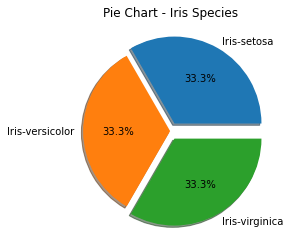

In [9]:
explode = [0.1,0,0.1]
plt.pie(data['Species'].value_counts(), labels=data['Species'].unique(), shadow=True, explode=explode, autopct='%1.1f%%')
plt.title("Pie Chart - Iris Species")
plt.show()

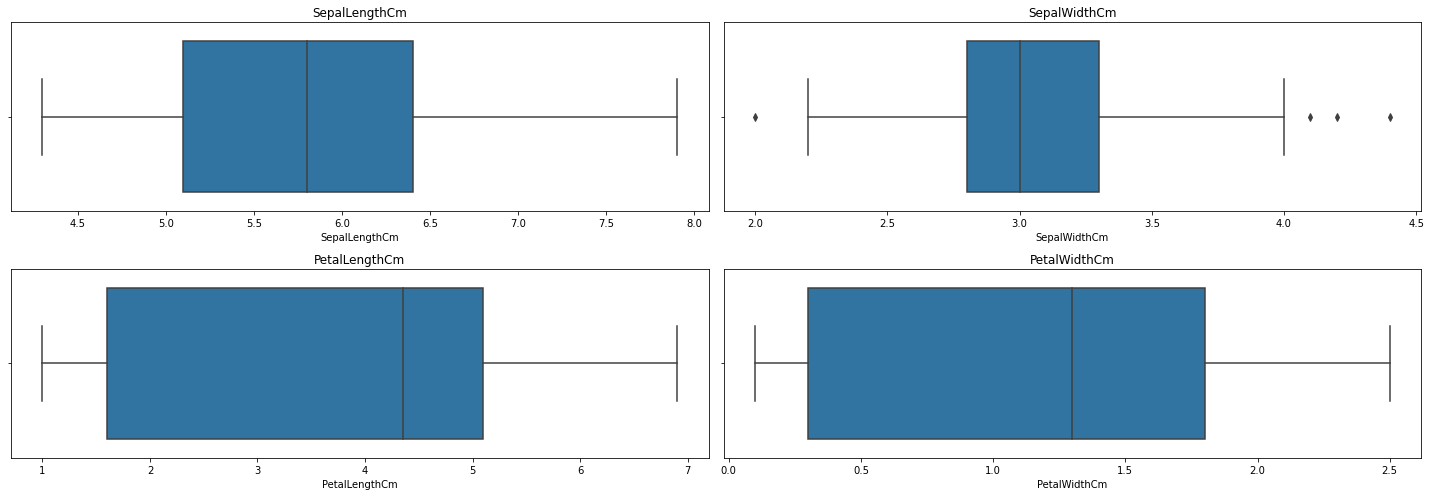

In [10]:
col= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

j = 1
plt.figure(figsize= (20,7))
for i in col:
    plt.subplot(2,2,j)
    sns.boxplot(data[i])
    plt.title(i)
    j = j+1
plt.tight_layout()

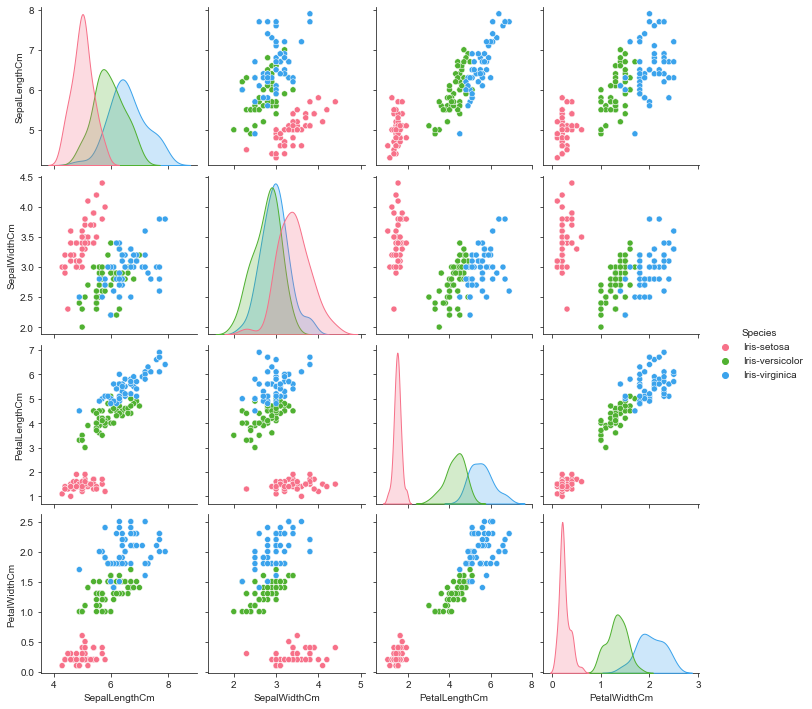

In [11]:
#plotting pairplot to check the target feature spread with respect to indpendent variables
sns.set_style("ticks")
sns.pairplot(data,hue = 'Species',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

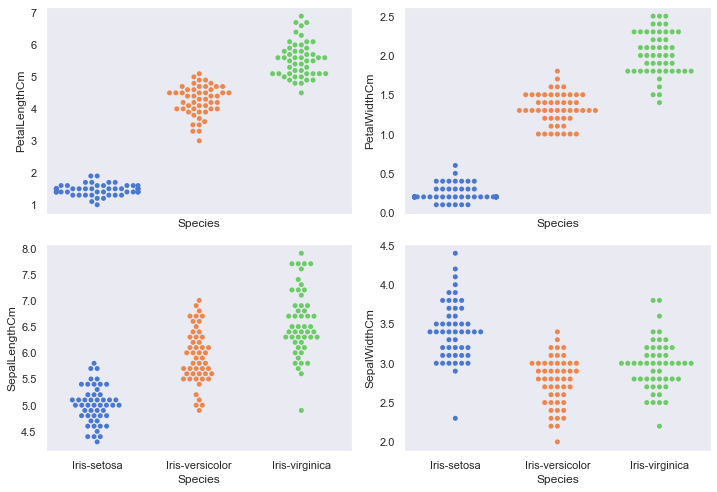

In [12]:
sns.set(style="dark", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)
#sns.despine(left=True)

sns.swarmplot(x="Species", y="PetalLengthCm", data=data, ax=axes[0, 0])
sns.swarmplot(x="Species", y="PetalWidthCm", data=data, ax=axes[0, 1])
sns.swarmplot(x="Species", y="SepalLengthCm", data=data, ax=axes[1, 0])
sns.swarmplot(x="Species", y="SepalWidthCm", data=data, ax=axes[1, 1])
plt.xticks()
plt.tight_layout()

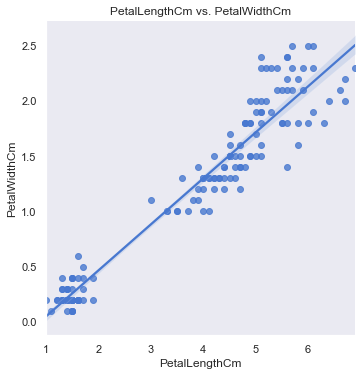

In [13]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm",data=data)
plt.title("PetalLengthCm vs. PetalWidthCm")
plt.show()

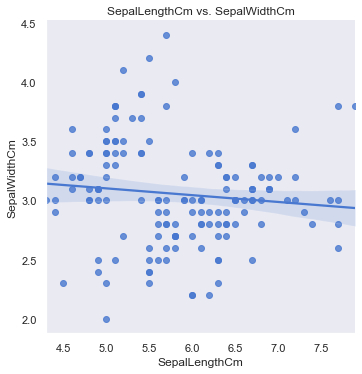

In [14]:
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm",data=data)
plt.title("SepalLengthCm vs. SepalWidthCm")
plt.show()

<b> Flexibly Plot of length and width </b>

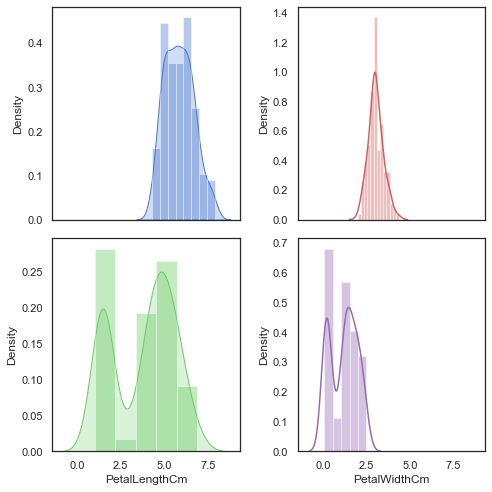

In [15]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
#sns.despine(left=True)

sns.distplot(data['SepalLengthCm'], hist = True, color="b", kde_kws={"shade": True}, ax=axes[0, 0])
sns.distplot(data['SepalWidthCm'], hist=True, rug=False, color="r", ax=axes[0, 1])
sns.distplot(data['PetalLengthCm'], hist=True, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(data['PetalWidthCm'], color="m", ax=axes[1, 1])

plt.xticks()
plt.tight_layout()

<b> Individual histogram of length and width </b>

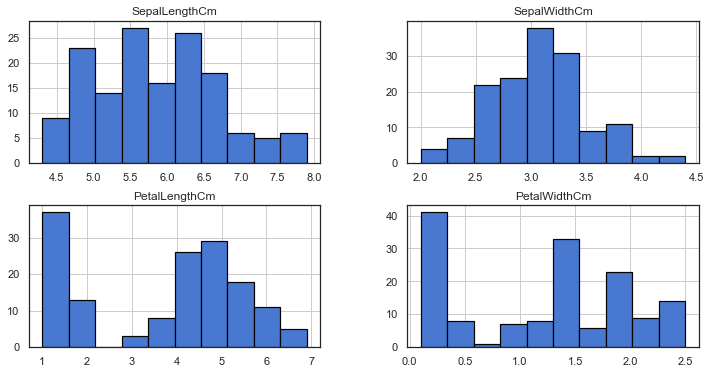

In [16]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<b> Species wise variation of length and width </b>

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

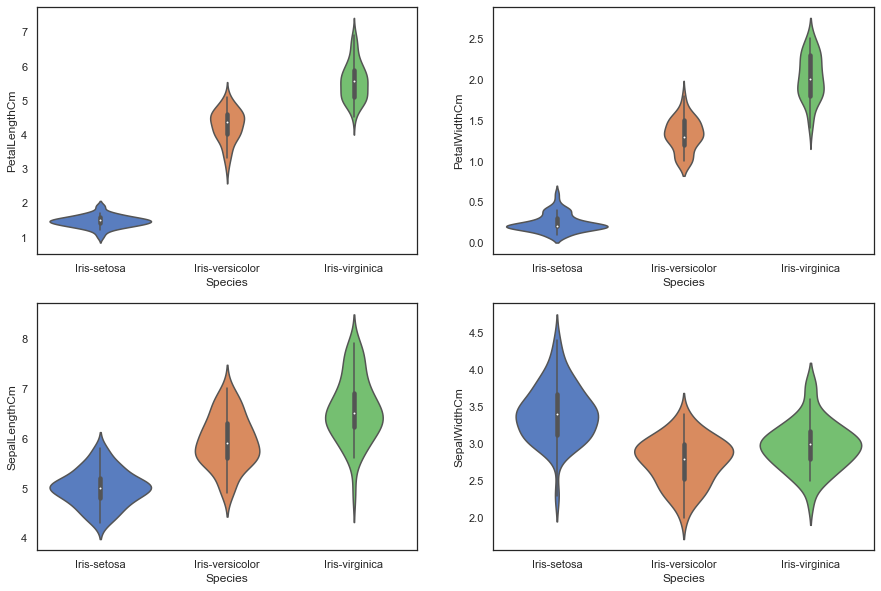

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

<b> Checking the outliers and data quartiles - Species wise </b>

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

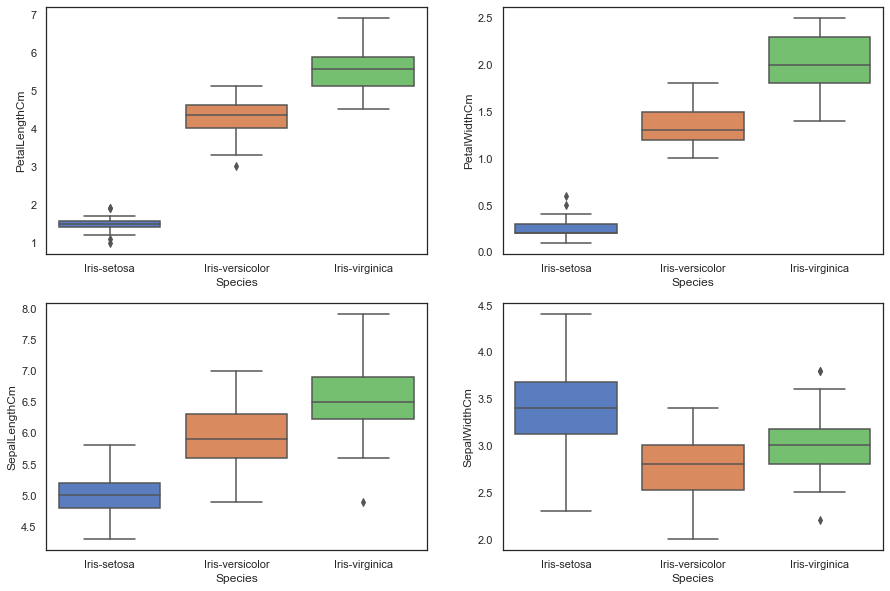

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=data)

<b> Species column in a nutshell </b>

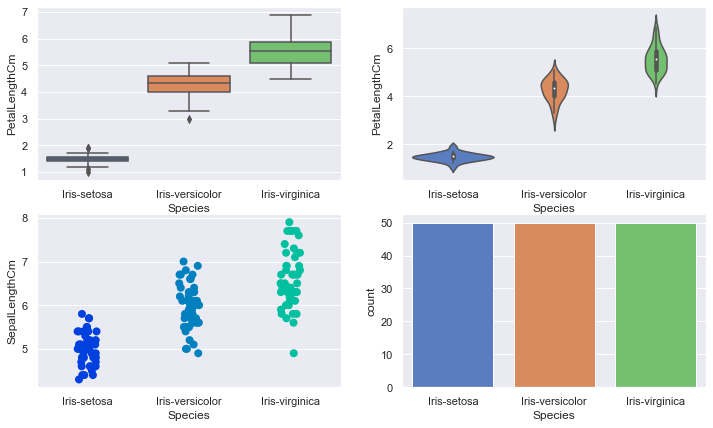

In [19]:
sns.set_style('darkgrid')
f,axes=plt.subplots(2,2,figsize=(12, 7))

k1=sns.boxplot(x="Species", y="PetalLengthCm", data=data,ax=axes[0,0])
k2=sns.violinplot(x='Species',y='PetalLengthCm',data=data,ax=axes[0,1])
k3=sns.stripplot(x='Species',y='SepalLengthCm',data=data,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v',ax=axes[1,0])
k4=sns.countplot(data['Species'], ax=axes[1,1])
plt.show()

<b> One Hot Encoding on Target Variable </b>

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [22]:
data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

<b> Scatter Plot of Species </b>

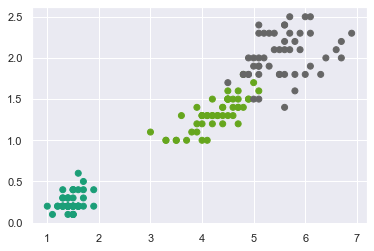

In [23]:
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],c=data.Species.values, cmap="Dark2")

<b> Correlation of features with target column </b> 

<AxesSubplot:>

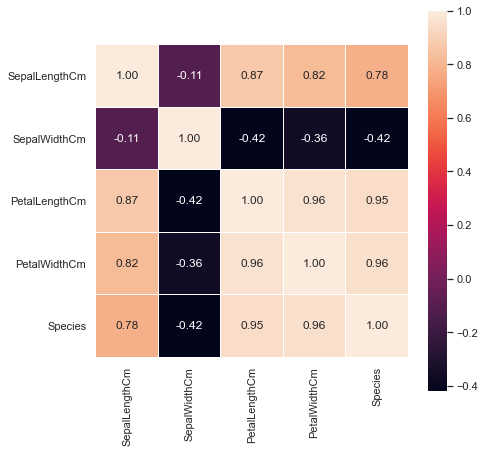

In [24]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), linecolor='white', linewidths=0.3, square = True, annot=True, fmt=".2f")

<b> Data Split </b> 

In [25]:
X = data.iloc[:,[0,1,2,3]].values
y = data['Species']

<b> Elbow Method using within-cluster-sum-of-squares(wcss) </b>

In [26]:
from sklearn.cluster import KMeans

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

<b> Plotting the Graph </b>

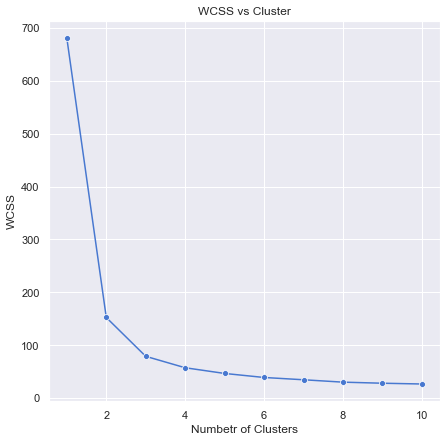

In [28]:
plt.figure(figsize=(7,7))
sns.lineplot(range(1, 11), wcss, marker='o')
plt.title('WCSS vs Cluster')
plt.xlabel("Numbetr of Clusters")
plt.ylabel("WCSS")
plt.show()

<b> The optimum value for K will be 3. As we can see that with an increase in the number of clusters after 3, the decrese in WCSS value is minimal or slow. </b>

<b> With k = 3 </b>

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<b> Visualizing the Clusters </b>

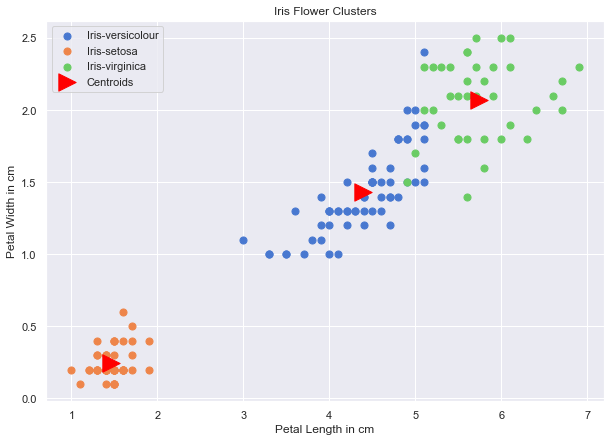

In [30]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(X[y_pred == 0, 2], X[y_pred == 0, 3], s = 50, label = 'Iris-versicolour')
plt.scatter(X[y_pred == 1, 2], X[y_pred == 1, 3], s = 50, label = 'Iris-setosa')
plt.scatter(X[y_pred == 2, 2], X[y_pred == 2, 3],s = 50, label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='>', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

# THE END!!!